<a href="https://colab.research.google.com/github/IbrahimLukeBarhoumeh/DataMiningAssingment5/blob/main/Ibrahim_Barhoumeh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREP STAGES

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/MyDrive/dataminingfolder"



Mounted at /content/drive
Boat_dataset  cnn_model.h5  spectrograms


In [2]:
import zipfile
import os


zip_dir = "/content/drive/MyDrive/dataminingfolder/Boat_dataset"

# List of zip files
zip_files = [
    "KaiYuan数据集.zip",
    "SpeedBoat数据集 (1).zip",
    "UUV.zip",
    "noise_target数据集.zip"
]

# Unzip
for zip_file in zip_files:
    zip_path = os.path.join(zip_dir, zip_file)
    extract_to = f"/content/{zip_file.replace('.zip', '')}"

    print(f"Unzipping {zip_file}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)


Unzipping KaiYuan数据集.zip...
Unzipping SpeedBoat数据集 (1).zip...
Unzipping UUV.zip...
Unzipping noise_target数据集.zip...


TASK 1


In [3]:
##1.1

import os
import librosa


folders = {
    "KaiYuan": "/content/KaiYuan数据集/KaiYuan数据集/other",
    "SpeedBoat": "/content/SpeedBoat数据集 (1)/SpeedBoat数据集/other",
    "UUV": "/content/UUV/UUV数据集/other"

}

for label, folder_path in folders.items():
    total_duration = 0.0
    count = 0

    for file in os.listdir(folder_path):
        if file.endswith(".wav") or file.endswith(".WAV"):
            file_path = os.path.join(folder_path, file)
            try:
                y, sr = librosa.load(file_path, sr=None)
                duration = len(y) / sr
                total_duration += duration
                count += 1
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

    print(f"{label} ➤ {count} files, {total_duration / 60:.2f} minutes total")


KaiYuan ➤ 2667 files, 133.35 minutes total
SpeedBoat ➤ 6262 files, 313.10 minutes total
UUV ➤ 2000 files, 100.00 minutes total


In [4]:
## 1.2 KaiYuan

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from google.colab import drive


drive.mount('/content/drive')


input_folder = "/content/KaiYuan数据集/KaiYuan数据集/other"
output_folder = "/content/drive/MyDrive/dataminingfolder/spectrograms/KaiYuan"
os.makedirs(output_folder, exist_ok=True)

# Batch size
max_files = 1000

# Spectrogram function
def create_and_save_spectrogram(audio_path, save_path):
    try:
        y, sr = librosa.load(audio_path, sr=None)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_db = librosa.power_to_db(S, ref=np.max)

        plt.figure(figsize=(2, 2))
        librosa.display.specshow(S_db, sr=sr, x_axis=None, y_axis=None, cmap='magma')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
        plt.close()
    except Exception as e:
        print(f" Failed: {audio_path} → {e}")

# Get .wav files
all_files = [f for f in os.listdir(input_folder) if f.lower().endswith('.wav')]
total_files = len(all_files)
completed = 0

print(f" Found {total_files} .wav files in KaiYuan")


while True:
    batch = []
    for file in all_files:
        out_path = os.path.join(output_folder, file.replace(".wav", ".png").replace(".WAV", ".png"))
        if not os.path.exists(out_path):
            batch.append(file)
        if len(batch) >= max_files:
            break

    if not batch:
        print(" All KaiYuan spectrograms are complete and saved to Drive!")
        break

    print(f" Processing batch of {len(batch)} files...")

    for file in tqdm(batch, desc="Batch Progress", unit="file"):
        in_path = os.path.join(input_folder, file)
        out_path = os.path.join(output_folder, file.replace(".wav", ".png").replace(".WAV", ".png"))
        create_and_save_spectrogram(in_path, out_path)

    completed += len(batch)
    print(f" Processed {completed}/{total_files} files so far\n")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Found 2667 .wav files in KaiYuan
 All KaiYuan spectrograms are complete and saved to Drive!


In [5]:

kaiyuan_dir = "/content/drive/MyDrive/dataminingfolder/spectrograms/KaiYuan"

png_count = len([f for f in os.listdir(kaiyuan_dir) if f.endswith(".png")])
print(f" Found {png_count} .png spectrograms in KaiYuan folder.")



 Found 2667 .png spectrograms in KaiYuan folder.


In [6]:
## 1.2 SpeedBoat

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from google.colab import drive


drive.mount('/content/drive')


input_folder = "/content/SpeedBoat数据集 (1)/SpeedBoat数据集/other"
output_folder = "/content/drive/MyDrive/dataminingfolder/spectrograms/SpeedBoat"
os.makedirs(output_folder, exist_ok=True)

#  files batch
max_files = 1000

# Spectrogram generation
def create_and_save_spectrogram(audio_path, save_path):
    try:
        y, sr = librosa.load(audio_path, sr=None)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_db = librosa.power_to_db(S, ref=np.max)

        plt.figure(figsize=(2, 2))
        librosa.display.specshow(S_db, sr=sr, x_axis=None, y_axis=None, cmap='magma')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
        plt.close()
    except Exception as e:
        print(f" Failed: {audio_path} → {e}")

# Get .wav files
all_files = [f for f in os.listdir(input_folder) if f.lower().endswith('.wav')]
total_files = len(all_files)
print(f" Found {total_files} .wav files in SpeedBoat dataset")

# Batch-safe loop
completed = 0
while True:
    batch = []
    for file in all_files:
        out_path = os.path.join(output_folder, file.replace(".wav", ".png").replace(".WAV", ".png"))
        if not os.path.exists(out_path):
            batch.append(file)
        if len(batch) >= max_files:
            break

    if not batch:
        print(" All spectrograms generated for SpeedBoat and saved to Drive!")
        break

    print(f" Processing batch of {len(batch)} files...")

    for file in tqdm(batch, desc="Batch Progress", unit="file"):
        in_path = os.path.join(input_folder, file)
        out_path = os.path.join(output_folder, file.replace(".wav", ".png").replace(".WAV", ".png"))
        create_and_save_spectrogram(in_path, out_path)

    completed += len(batch)
    print(f" Processed {completed}/{total_files} files so far\n")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Found 6262 .wav files in SpeedBoat dataset
 All spectrograms generated for SpeedBoat and saved to Drive!


In [7]:

original_wav_dir = "/content/SpeedBoat数据集 (1)/SpeedBoat数据集/other"
wav_count = len([f for f in os.listdir(original_wav_dir) if f.lower().endswith(".wav")])
print(f" Found {wav_count} .wav files in original SpeedBoat dataset.")

if wav_count == png_count:
    print(" Match! All .wav files were successfully converted to .png spectrograms.")
else:
    print(f" Mismatch: {wav_count} .wav files vs {png_count} .png spectrograms")


 Found 6262 .wav files in original SpeedBoat dataset.
 Mismatch: 6262 .wav files vs 2667 .png spectrograms


In [8]:
## 1.2 UUV

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from google.colab import drive


drive.mount('/content/drive')


input_folder = "/content/UUV/UUV数据集/other"


output_folder = "/content/drive/MyDrive/dataminingfolder/spectrograms/UUV"
os.makedirs(output_folder, exist_ok=True)

# Max files batch
max_files = 1000

# Spectrogram function
def create_and_save_spectrogram(audio_path, save_path):
    try:
        y, sr = librosa.load(audio_path, sr=None)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_db = librosa.power_to_db(S, ref=np.max)

        plt.figure(figsize=(2, 2))
        librosa.display.specshow(S_db, sr=sr, x_axis=None, y_axis=None, cmap='magma')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
        plt.close()
    except Exception as e:
        print(f" Failed: {audio_path} → {e}")

# .wav files
all_files = [f for f in os.listdir(input_folder) if f.lower().endswith('.wav')]
total_files = len(all_files)
completed = 0

print(f" Found {total_files} .wav files in UUV dataset")

#  batch-processing loop
while True:
    batch = []
    for file in all_files:
        out_path = os.path.join(output_folder, file.replace(".wav", ".png").replace(".WAV", ".png"))
        if not os.path.exists(out_path):
            batch.append(file)
        if len(batch) >= max_files:
            break

    if not batch:
        print(" All spectrograms generated for UUV and saved to Drive!")
        break

    print(f" Processing batch of {len(batch)} files...")

    for file in tqdm(batch, desc="Batch Progress", unit="file"):
        in_path = os.path.join(input_folder, file)
        out_path = os.path.join(output_folder, file.replace(".wav", ".png").replace(".WAV", ".png"))
        create_and_save_spectrogram(in_path, out_path)

    completed += len(batch)
    print(f" Processed {completed}/{total_files} files so far\n")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Found 2000 .wav files in UUV dataset
 All spectrograms generated for UUV and saved to Drive!


In [9]:
## 1.3 Normalize and Resize Spectrogram Images

import os
import cv2
import numpy as np
from tqdm import tqdm


input_base_dir = "/content/drive/MyDrive/dataminingfolder/spectrograms"
output_base_dir = "/content/spectrograms_resized_npy"
os.makedirs(output_base_dir, exist_ok=True)

#  shape and mode
target_size = (128, 128)
color_mode = cv2.IMREAD_GRAYSCALE

# Process class
for class_name in os.listdir(input_base_dir):
    input_dir = os.path.join(input_base_dir, class_name)
    output_dir = os.path.join(output_base_dir, class_name)
    os.makedirs(output_dir, exist_ok=True)

    print(f" Resizing & normalizing: {class_name}")
    count = 0
    for filename in tqdm(os.listdir(input_dir), desc=class_name):
        if filename.endswith(".png"):
            img_path = os.path.join(input_dir, filename)
            save_path = os.path.join(output_dir, filename.replace(".png", ".npy"))

            try:
                img = cv2.imread(img_path, color_mode)

                if img is None:
                    raise ValueError("Image could not be read.")

                resized = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
                normalized = resized.astype(np.float32) / 255.0

                np.save(save_path, normalized)
                count += 1
            except Exception as e:
                print(f" Error processing {img_path}: {e}")

    print(f" {count} spectrograms saved for class '{class_name}'")



 Resizing & normalizing: KaiYuan


KaiYuan: 100%|██████████| 2667/2667 [01:06<00:00, 40.17it/s] 


 2667 spectrograms saved for class 'KaiYuan'
 Resizing & normalizing: SpeedBoat


SpeedBoat: 100%|██████████| 6262/6262 [02:45<00:00, 37.78it/s] 


 6262 spectrograms saved for class 'SpeedBoat'
 Resizing & normalizing: UUV


UUV: 100%|██████████| 2000/2000 [00:48<00:00, 41.39it/s] 

 2000 spectrograms saved for class 'UUV'



 Displaying samples from class: KaiYuan


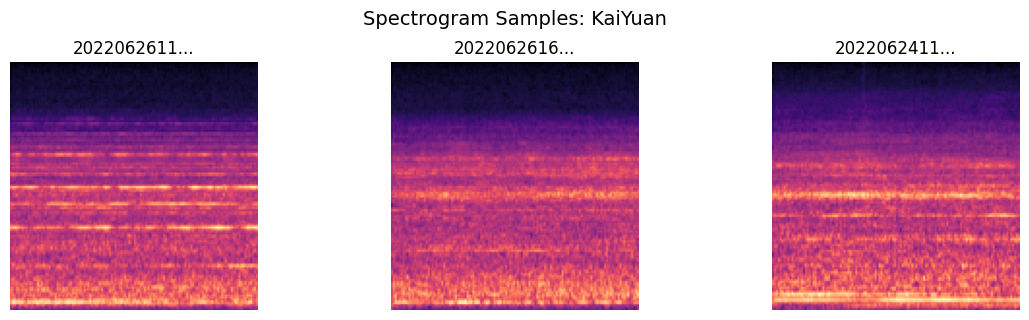


 Displaying samples from class: SpeedBoat


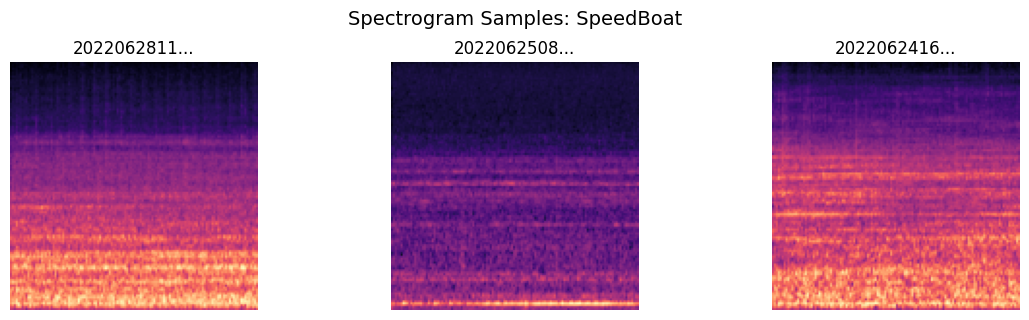


 Displaying samples from class: UUV


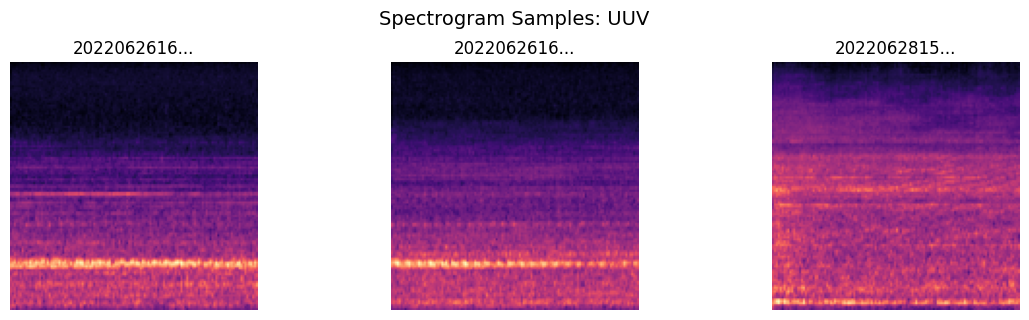

In [10]:
## 1.4 Visualize Example Spectrograms for Each Ship Type

import numpy as np
import matplotlib.pyplot as plt
import os
import random


base_dir = "/content/spectrograms_resized_npy"

# Classes
classes_to_plot = ["KaiYuan", "SpeedBoat", "UUV"]
samples_per_class = 3

# Plotting
for class_name in classes_to_plot:
    class_path = os.path.join(base_dir, class_name)
    all_files = [f for f in os.listdir(class_path) if f.endswith(".npy")]

    print(f"\n Displaying samples from class: {class_name}")

    # Select files
    selected = random.sample(all_files, samples_per_class)

    # Plot
    fig, axes = plt.subplots(1, samples_per_class, figsize=(12, 3))
    for i, filename in enumerate(selected):
        img = np.load(os.path.join(class_path, filename))
        axes[i].imshow(img, cmap='magma')
        axes[i].axis('off')
        axes[i].set_title(f"{filename[:10]}...")

    plt.tight_layout()
    plt.suptitle(f"Spectrogram Samples: {class_name}", fontsize=14, y=1.05)
    plt.show()


TASK 2

In [11]:
## 2.1


!pip install -q tensorflow scikit-learn

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


data_base_dir = "/content/spectrograms_resized_npy"
class_names = sorted(os.listdir(data_base_dir))

# Load spectrograms and labels
X = []
y = []

for idx, class_name in enumerate(class_names):
    class_dir = os.path.join(data_base_dir, class_name)
    for file in os.listdir(class_dir):
        if file.endswith(".npy"):
            img = np.load(os.path.join(class_dir, file))
            X.append(img)
            y.append(idx)

X = np.array(X)[..., np.newaxis]
y = np.array(y)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# CNN model definition
model = models.Sequential([
    layers.Input(shape=(128, 128, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#  model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,451 (12.61 MB)

 Trainable params: 3,304,451 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.5632 - loss: 0.9771 - val_accuracy: 0.6226 - val_loss: 0.8414
Epoch 2/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6546 - loss: 0.7665 - val_accuracy: 0.6871 - val_loss: 0.6521
Epoch 3/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6938 - loss: 0.6349 - val_accuracy: 0.7219 - val_loss: 0.5731
Epoch 4/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7312 - loss: 0.5492 - val_accuracy: 0.7429 - val_loss: 0.5318
Epoch 5/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7487 - loss: 0.5154 - val_accuracy: 0.7397 - val_loss: 0.5046
Epoch 6/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7574 - loss: 0.4709 - val_accuracy: 0.7333 - val_loss: 0.5064
Epoch 7/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7698 - loss: 0.4507 - val_accuracy: 0.7562 - val_loss: 0.4694
Epoch 8/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7787 - loss: 0.4233 - val_ac

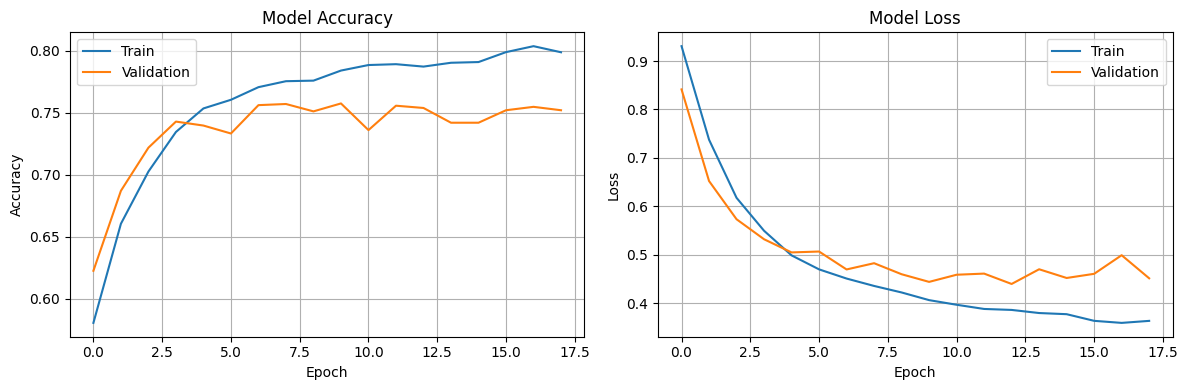

In [12]:
## 2.2

from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Early stopping avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train CNN model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Plot training vs. validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training vs. validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
Classification Report:

              precision    recall  f1-score   support

     KaiYuan       0.68      0.47      0.56       533
   SpeedBoat       0.82      0.91      0.86      1253
         UUV       0.61      0.65      0.63       400

    accuracy                           0.75      2186
   macro avg       0.70      0.68      0.68      2186
weighted avg       0.75      0.75      0.74      2186



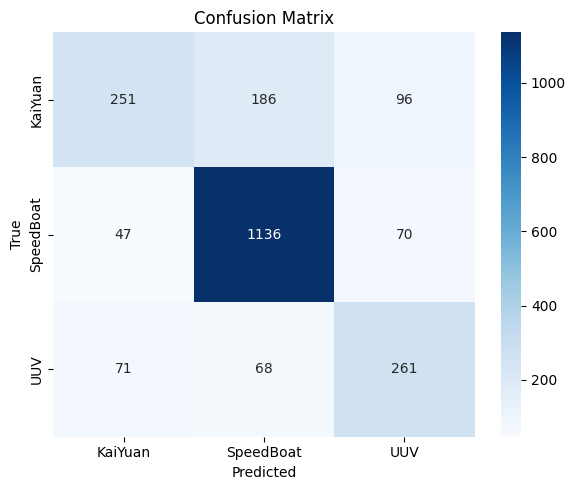

In [13]:
##2.3
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict validation data
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

# Accuracy, Precision, Recall, F1
print("Classification Report:\n")
print(classification_report(y_val, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


In [14]:
model.save('/content/drive/MyDrive/dataminingfolder/cnn_model.h5')


TASK 3

In [22]:
## 3.1 transformer based model
import tensorflow as tf
from tensorflow.keras import layers, models

# Def  patch-based image encoder
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation="gelu")(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

def build_transformer_classifier(input_shape=(128, 128), patch_size=16, num_classes=3, projection_dim=64, transformer_layers=4):
    num_patches = (input_shape[0] // patch_size) * (input_shape[1] // patch_size)

    inputs = layers.Input(shape=input_shape)
    x = layers.Reshape((input_shape[0], input_shape[1], 1))(inputs)

    #  non-overlapping patches
    patches = layers.Conv2D(filters=projection_dim, kernel_size=patch_size, strides=patch_size)(x)
    x = layers.Reshape((num_patches, projection_dim))(patches)


    pos_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)
    positions = tf.range(start=0, limit=num_patches, delta=1)
    x += pos_embedding(positions)


    for _ in range(transformer_layers):
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)
        attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=projection_dim, dropout=0.1)(x1, x1)
        x2 = layers.Add()([x, attention_output])


        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=[projection_dim * 2, projection_dim], dropout_rate=0.1)
        x = layers.Add()([x2, x3])

    # Final representation
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Build model
transformer_model = build_transformer_classifier()
transformer_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 128, 128)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_7 (Reshape) │ (None, 128, 128,  │          0 │ input_layer_8[0]… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8, 64)  │     16,448 │ reshape_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_8 (Reshape) │ (None, 64, 64)    │          0 │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 64, 64)    │          0 │ reshape_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add_8[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 64, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 64, 64)    │          0 │ add_8[0][0],      │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add_9[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64, 128)   │          0 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 64, 64)    │      8,256 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 64, 64)    │          0 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_10 (Add)        │ (None, 64, 64)    │          0 │ add_9[0][0],      │
│                     │                   │            │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add_10[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 64, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_11 (Add)        │ (None, 64, 64)    │          0 │ add_10[0][0],     │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add_11[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 358,083 (1.37 MB)

 Trainable params: 358,083 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
## 3.2

import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


base_dir = "/content/spectrograms_resized_npy"


class_names = sorted(os.listdir(base_dir))
print("Classes found:", class_names)

#  data and labels
data = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(base_dir, class_name)
    files = [f for f in os.listdir(class_dir) if f.endswith(".npy")]

    for f in files:
        arr = np.load(os.path.join(class_dir, f))
        if arr.shape != (128, 128):
            continue
        data.append(arr)
        labels.append(class_name)

print(f"Loaded {len(data)} samples.")


X = np.array(data)
y = np.array(labels)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_onehot = to_categorical(y_encoded, num_classes=3)

# Train/Val/Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y_onehot, test_size=0.30, stratify=y_encoded, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=np.argmax(y_temp, axis=1), random_state=42)

# Final shapes
print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)


X_train = np.expand_dims(X_train, axis=-1)
X_val   = np.expand_dims(X_val, axis=-1)
X_test  = np.expand_dims(X_test, axis=-1)


Classes found: ['KaiYuan', 'SpeedBoat', 'UUV']
Loaded 10929 samples.
Train: (7650, 128, 128) (7650, 3)
Val:   (1639, 128, 128) (1639, 3)
Test:  (1640, 128, 128) (1640, 3)


Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 49s 72ms/step - accuracy: 0.5577 - loss: 1.0196 - val_accuracy: 0.5729 - val_loss: 0.9757
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5647 - loss: 0.9943 - val_accuracy: 0.5729 - val_loss: 0.9807
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5653 - loss: 0.9897 - val_accuracy: 0.5729 - val_loss: 0.9957
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5739 - loss: 0.9837 - val_accuracy: 0.5729 - val_loss: 0.9750
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5738 - loss: 0.9838 - val_accuracy: 0.5729 - val_loss: 0.9964
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5742 - loss: 0.9855 - val_accuracy: 0.5729 - val_loss: 0.9768
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5673 - loss: 0.9863 - val_accuracy: 0.5729 - val_loss: 0.9743
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5836 - loss: 0.9675 - val_ac

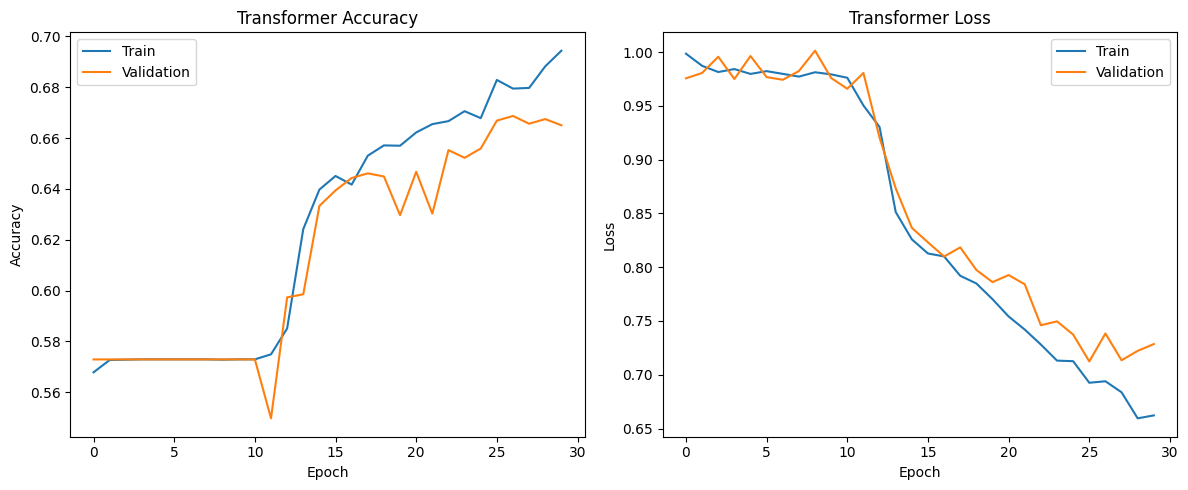

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step

Classification Report (Transformer):
              precision    recall  f1-score   support

     KaiYuan       0.49      0.23      0.32       400
   SpeedBoat       0.75      0.89      0.81       940
         UUV       0.49      0.55      0.52       300

    accuracy                           0.67      1640
   macro avg       0.58      0.56      0.55      1640
weighted avg       0.64      0.67      0.64      1640



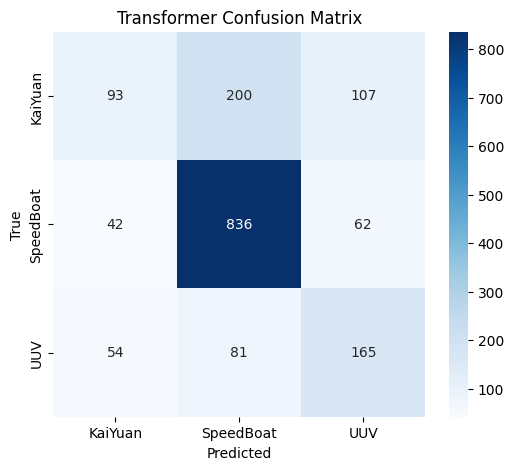

In [24]:
## 3.3

import tensorflow as tf
from tensorflow.keras import layers, models


import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np



# Early stopping prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile transformer model
transformer_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history_transformer = transformer_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Plot accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy
ax1.plot(history_transformer.history['accuracy'], label='Train')
ax1.plot(history_transformer.history['val_accuracy'], label='Validation')
ax1.set_title('Transformer Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss
ax2.plot(history_transformer.history['loss'], label='Train')
ax2.plot(history_transformer.history['val_loss'], label='Validation')
ax2.set_title('Transformer Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

# Predict test set
y_pred = transformer_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

#  report
print("\nClassification Report (Transformer):")
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Transformer Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


TASK 4

Compare classification results of CNN and transformer models:

which one preformed better:
CNN outpreformed the transformer model in all key metrics:

*   CNN accuracy 76% VS Transformer 67%
*   Best class: SpeedBoat (f1= .86)   Vs Transformer SpeedBoat (f1=.80)
weakest class: KaiYuan (F1= 0.61)  VS Transformer SpeedBoat (F1= 0.32)

Both models struggled with KaiYuan, but CNN hadled way better



Why CNN preformed better:

*   CNN naturally suited for spatial data, capturing local patterns effectively using convolution filers
*   Transformers models require larger datasets and longer training to match CNN preformance


STRENGHTS/ Weakness:
CNN model:
Strengths:
high accuracy
good at picking up local spectrogram features
simple and efficent

Weakness:
*   limited global context awareness
*   Might miss long range dependencies across time or frequency


TRANSFORMER MODEL:
STRENGHTS:
Good at modeling global patterns and long-range relationships
more flexible architecture

Weakness:
lower accuracy due to dataset size and less localized feature extraction
more intensive and sensetive to tuning


TASK 5

Discussion and Insights
Role of Spectrograms:
Spectrograms played a key role by converting raw audio into a visual format that models could process as images. This allowed the CNN and Transformer to detect time-frequency patterns specific to different ship types, making classification possible.

Challenges Faced:
Preprocessing thousands of .wav files into spectrograms required careful batch handling due to memory limits in Google Colab. The CNN model was easier to train and tune, while the Transformer model needed more reshaping, parameter tuning, and was slower to converge. Evaluating performance across imbalanced classes like KaiYuan was also a challenge.

Recommendations for Future Work:
Use a larger and more balanced dataset to improve generalization, especially for the Transformer. Apply data augmentation to simulate real-world variability. Explore hybrid models that combine CNNs for local features and Transformers for global context. Finally, consider transfer learning or pretrained audio models to improve accuracy and reduce training time.
